In [14]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

import rental_utils; reload(rental_utils)

%matplotlib inline
sns.set(style="whitegrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Philipp.Deutsch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data, independent, test = rental_utils.load_data()
[X_train, X_val, y_train, y_val] = data

Loading raw data
Adding features
Adding regions
Adding variables
Dummyfying
Splitting data


In [22]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [23]:
preds_train, probs_train = rental_utils.predict(model, X_train)
preds_val, probs_val = rental_utils.predict(model, X_val)

ct = pd.crosstab(preds_val, y_val.values, margins=False)
print(ct)

print('')
ct_perc = ct.apply(lambda x: x/sum(x), axis=1)
print(ct_perc)

print('')
accuracy_val = float(np.sum(preds_val==y_val))/len(preds_val)
print('Validation Accuracy: ' + str(round(100*accuracy_val, 1)))
print('Log loss:            ' + str(round(log_loss(y_val, probs_val), 3)))

print('')
high_accuracy = ct_perc.iloc[0,0]
print('High Accuracy: ' + str(round(100*high_accuracy, 1)))
med_accuracy = ct_perc.iloc[2,2]
print('Medium Accuracy: ' + str(round(100*med_accuracy, 1)))
low_accuracy = ct_perc.iloc[1,1]
print('Low Accuracy: ' + str(round(100*low_accuracy, 1)))

col_0   high    low  medium
row_0                      
high     994     34     116
low      102  11009     516
medium   158    227    3131

col_0       high       low    medium
row_0                               
high    0.868881  0.029720  0.101399
low     0.008773  0.946848  0.044379
medium  0.044937  0.064562  0.890501

Validation Accuracy: 92.9
Log loss:            0.262

High Accuracy: 86.9
Medium Accuracy: 89.1
Low Accuracy: 94.7


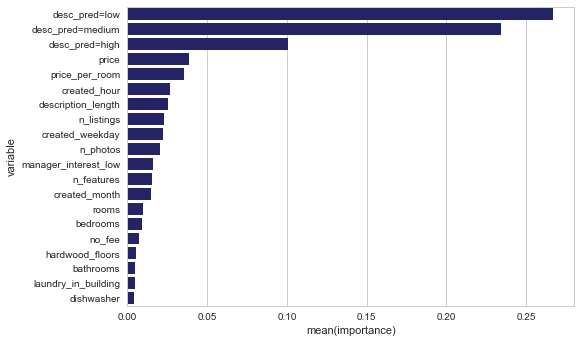

In [ ]:
importance = pd.DataFrame({'variable':independent, 'importance':model.feature_importances_})
importance.sort_values(by='importance', ascending=False, inplace=True)
top_importance = importance.head(20)

sns.barplot(y='variable', x='importance', color="midnightblue", data=top_importance)

In [ ]:
X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])

model.fit(X, y)
pickle.dump(model, open("Models/manual_rf.pkl", "wb"))

In [ ]:
rental_utils.prepare_submission(model, test, independent)